In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 65.7 MB/s eta 0:00:00


**Создаем модель, обучаем, прогнозируем, проверяем ошибки**

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from pmdarima import auto_arima

In [ ]:
#загружаю датасет
!gdown --id 1FC6sJ-UX6fjbPEGKnmh_D_IlspM9r0iH
df = pd.read_csv("COCO COLA.csv")

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FC6sJ-UX6fjbPEGKnmh_D_IlspM9r0iH
To: /content/COCO COLA.csv
100% 1.01M/1.01M [00:00<00:00, 28.6MB/s]


In [ ]:
df = df.iloc[14000:, ]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 14000 to 15095
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1096 non-null   object 
 1   Open       1096 non-null   float64
 2   High       1096 non-null   float64
 3   Low        1096 non-null   float64
 4   Close      1096 non-null   float64
 5   Adj Close  1096 non-null   float64
 6   Volume     1096 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 60.1+ KB


[Text(0.5, 0, ''), Text(0, 0.5, 'Значение')]

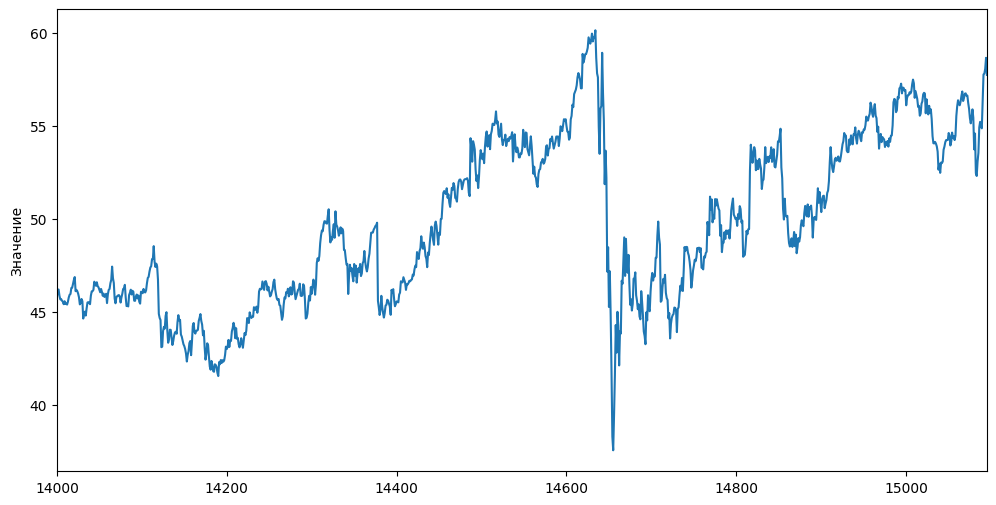

In [ ]:
xtitle=''
ylabel='Значение'
xlabel=''

ax=df['Close'].plot(figsize=(12,6), title=xtitle)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

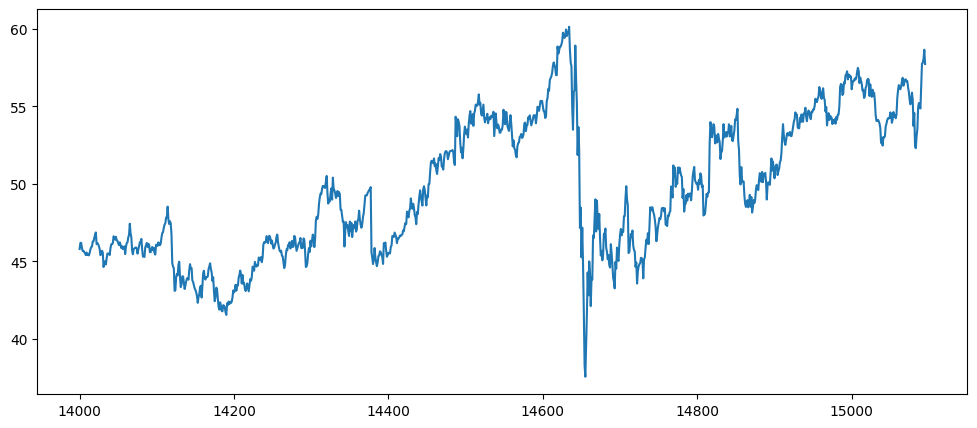

In [ ]:
df['Close'].plot(figsize=(12,5));

In [ ]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Объявляем параметры для графиков
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

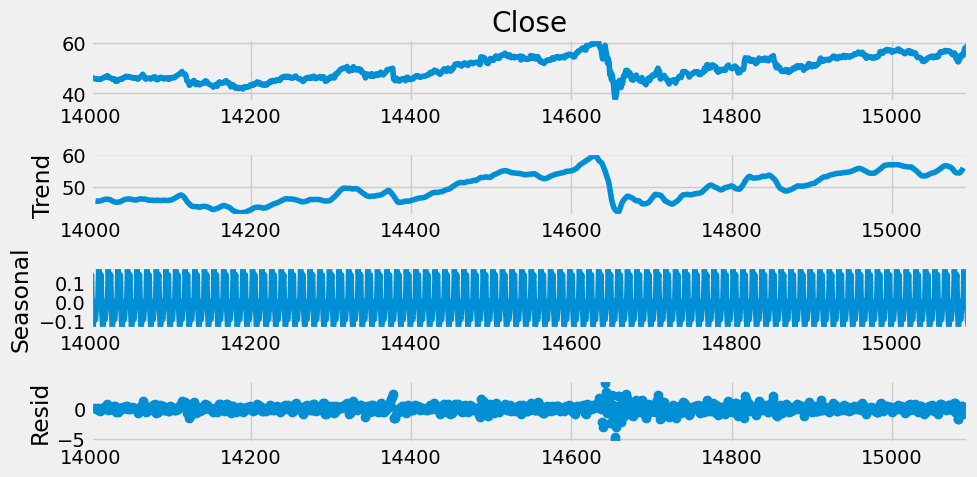

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df['Close'], period=12)

# Plot decomposition
decomp.plot();
plt.tight_layout();

In [ ]:
auto_arima(df['Close'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1096
Model:             SARIMAX(1, 1, 4)x(1, 0, [], 12)   Log Likelihood               -1066.075
Date:                             Sat, 08 Jul 2023   AIC                           2146.150
Time:                                     15:37:10   BIC                           2181.140
Sample:                                          0   HQIC                          2159.390
                                            - 1096                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7530      0.032    -23.638      0.000      -0.815      -0.691
ma.L1          0.7438      0.036     20.715      0.000       0.673       0.814
ma.L2          0.0310      0.020      1.537      0.124      -0.009       0.070
ma.L3          0.0185      0.023      0.803      0.422      -0.027       0.064
ma.L4         -0.1489      0.021     -7.246      0.000      -0.189      -0.109
ar.S.L12      -0.0769      0.020     -3.768      0.000      -0.117      -0.037
sigma2         0.4102      0.008     49.088      0.000       0.394       0.427
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              3922.24
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.88   Skew:                            -0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
len(df)

1096

In [ ]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
train = df.iloc[:1084]
test = df.iloc[1084:]
model = SARIMAX(train['Close'], order = (1,1,4), seasonal_order=(1, 0, [], 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                 1084
Model:             SARIMAX(1, 1, 4)x(1, 0, [], 12)   Log Likelihood               -1050.770
Date:                             Sat, 08 Jul 2023   AIC                           2115.540
Time:                                     15:37:19   BIC                           2150.453
Sample:                                          0   HQIC                          2128.758
                                            - 1084                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7575      0.032    -23.999      0.000      -0.819      -0.696
ma.L1          0.7433      0.036     20.907      0.000       0.674       0.813
ma.L2          0.0306      0.020      1.527      0.127      -0.009       0.070
ma.L3          0.0182      0.023      0.793      0.428      -0.027       0.063
ma.L4         -0.1507      0.021     -7.347      0.000      -0.191      -0.111
ar.S.L12      -0.0748      0.020     -3.681      0.000      -0.115      -0.035
sigma2         0.4075      0.008     49.276      0.000       0.391       0.424
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              4109.38
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.82   Skew:                            -0.98
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
xstart = len(train)
xend = len(train) + len(test)-1
predictions = results.predict(start = xstart, end = xend, dynamic=False, typ = 'levels').rename('SARIMAX(1, 1, 4)x(1, 0, [], 12)')

[Text(0.5, 0, ''), Text(0, 0.5, 'Close')]

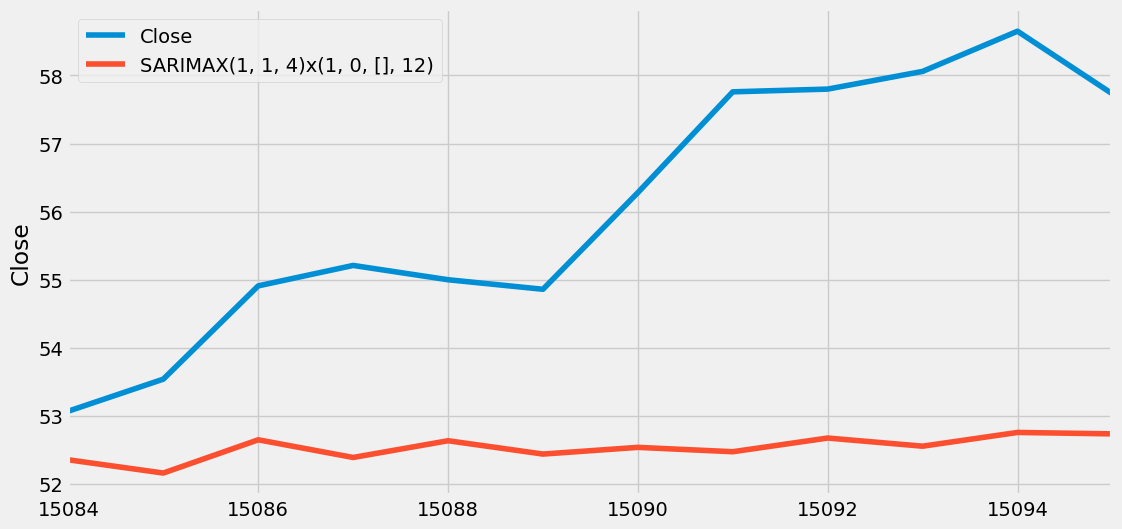

In [ ]:
xtitle = ''
xlabel = ''
ylabel = 'Close'
ax = test['Close'].plot(legend = True, figsize = (12,6), title = xtitle)
predictions.plot(legend = True)

ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test['Close'], predictions)
print(f'SARIMAX(1, 1, 4)x(1, 0, [], 12)	MSE Error:{error:11.10}')

from statsmodels.tools.eval_measures import rmse
error = rmse(test['Close'], predictions)
print(f'SARIMAX(1, 1, 4)x(1, 0, [], 12) RMSE Error:{error:11.10}')

SARIMAX(1, 1, 4)x(1, 0, [], 12)	MSE Error:15.42496478
SARIMAX(1, 1, 4)x(1, 0, [], 12) RMSE Error:3.927462894


In [ ]:
model = SARIMAX(df['Close'], order = (3,1,1), seasonal_order = (2, 0, [], 12))
results = model.fit()
fcast = results.predict(len(df)-1, len(df) + 12, typ = 'levels').rename ('SARIMAX(1, 1, 4)x(1, 0, [], 12)')
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                 1096
Model:             SARIMAX(3, 1, 1)x(2, 0, [], 12)   Log Likelihood               -1089.508
Date:                             Sat, 08 Jul 2023   AIC                           2193.016
Time:                                     15:37:32   BIC                           2228.005
Sample:                                          0   HQIC                          2206.256
                                            - 1096                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3278      0.310      1.056      0.291      -0.281       0.936
ar.L2          0.0753      0.024      3.086      0.002       0.027       0.123
ar.L3         -0.0629      0.016     -3.858      0.000      -0.095      -0.031
ma.L1         -0.3782      0.311     -1.216      0.224      -0.988       0.231
ar.S.L12      -0.0841      0.019     -4.479      0.000      -0.121      -0.047
ar.S.L24       0.0068      0.027      0.250      0.802      -0.046       0.060
sigma2         0.4283      0.008     52.480      0.000       0.412       0.444
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              5001.67
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.98   Skew:                            -1.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

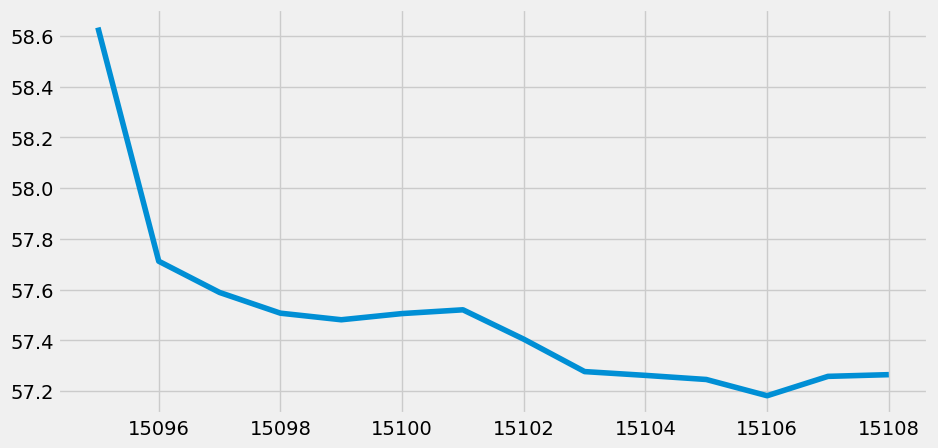

In [ ]:
from matplotlib.pyplot import legend
fcast.plot()

[Text(0.5, 0, ''), Text(0, 0.5, 'Close')]

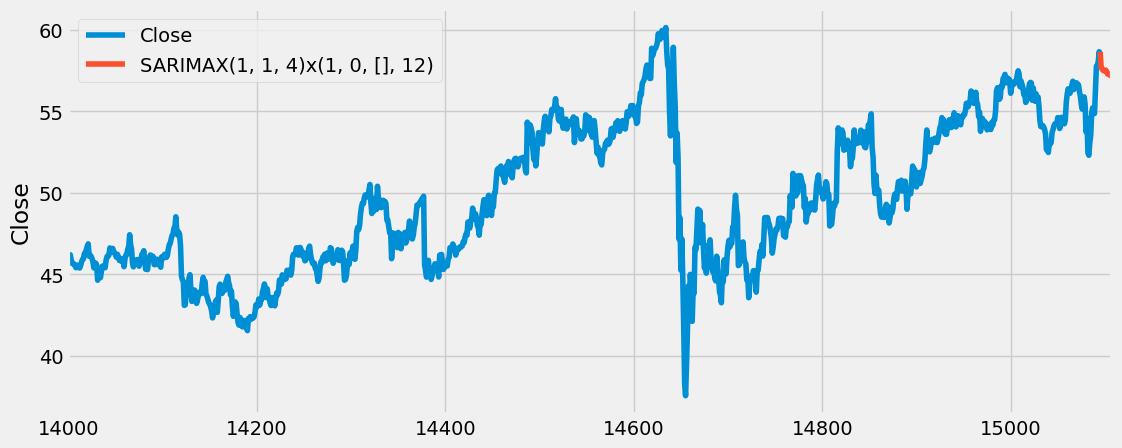

In [ ]:
xtitle = ''
xlabel = ''
ylabel = 'Close'
ax = df['Close'].plot(legend = True, figsize = (12,5), title = xtitle)
fcast.plot(legend = True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [ ]:
df.set_index('Date', inplace=True)
df.index.freq='MS'
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-14,45.669998,45.939999,45.619999,45.799999,39.579414,8421200
2017-08-15,45.799999,46.250000,45.799999,46.189999,39.916447,9638100
2017-08-16,46.150002,46.340000,46.119999,46.200001,39.925098,8087300
2017-08-17,46.119999,46.330002,45.849998,45.860001,39.631275,8477000
2017-08-18,45.799999,45.900002,45.630001,45.669998,39.467072,10879800
